### Task 1. Probability

In [39]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib
matplotlib.rcParams["figure.figsize"] = (4, 4)
matplotlib.rcParams["figure.dpi"] = 100
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
import scipy.stats as stats #https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
import scipy
import math

#### A

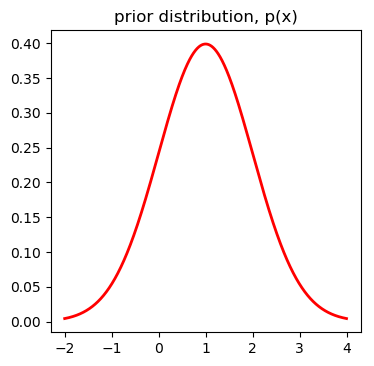

In [26]:
mu = 1
var = 1
sigma = np.sqrt(var)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
prior = stats.norm.pdf(x, mu, sigma)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r', linewidth=2)
plt.title('prior distribution, p(x)')
plt.show()

#### B

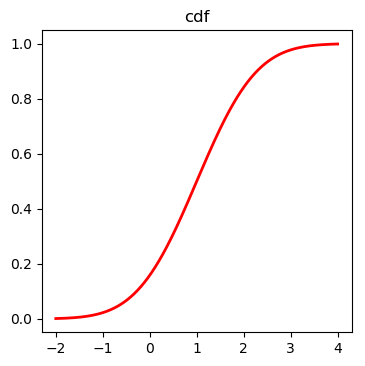

In [27]:
plt.plot(x, stats.norm.cdf(x, mu, sigma), 'r', linewidth=2)
plt.title('cdf')
plt.show()

In [28]:
cdf = stats.norm.cdf(x, mu, sigma)

In [29]:
cdf[x[x<=0].shape[0]]

0.16011289572699888

The probability is around 16%

If we will use more points, then it goes to 15.8 %

In [30]:
stats.norm.cdf(0, 1, 1)

0.15865525393145707

In [31]:
x2 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100000)
cdf2 = stats.norm.cdf(x2, mu, sigma)
cdf2[x2[x2<=0].shape[0]]

0.15866977275566801

#### C

$$ p(z|x) = \frac{p(x|z) p(z)}{p(x)} => p(x|z) = \frac{p(z|x) \ p(x)}{p(z)} = \frac{p(z|x) \ p(x)}{\int_{-\infty}^{+\infty}p(z|x) \ p(x) d x} $$

In [32]:
z = 0.75
var_z = 0.2
sigma_z = np.sqrt(var_z)

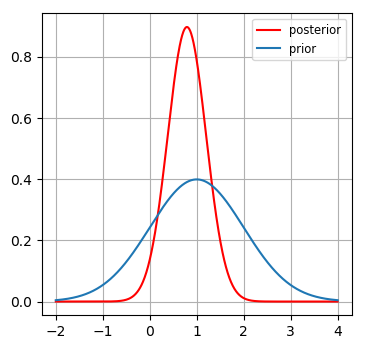

In [33]:
x_z = norm.pdf(z, x, sigma_z) * prior / norm.pdf(z, mu, sigma)
plt.plot(x, x_z, 'r', linewidth=1.5, label='posterior')
plt.plot(x, prior, label='prior')
plt.legend(loc='upper right', fontsize = 'small')
plt.grid()

#### D Estimate the expected value of the posterior distance to the wall qualitatively by inspection on the plot. The numerical solution is not necessary.

Let's look at the plot. We see that the mean of distribution is around 0.7-0.8 meters 

Actually we can easily check that

In [34]:
x[np.argmax(x_z)]

0.7927927927927927

#### E

$$ p(x, z) = p(z|x)p(x) $$

In [35]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 50)
Z = x.copy()

In [36]:
res = []
for i in x:
    res.append(scipy.stats.norm.pdf(Z, i, sigma_z))

z_x = np.vstack(res)
prior = stats.norm.pdf(x, mu, sigma).reshape(1, -1)
xz = prior * z_x

XX, ZZ = np.meshgrid(x, Z)

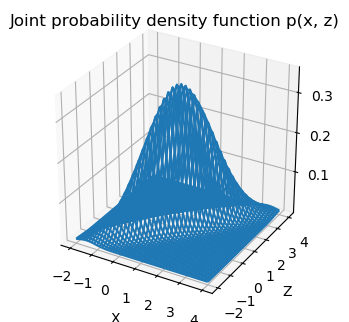

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(XX, ZZ, xz)
ax.set_xlabel('X')
ax.set_ylabel('Z')
plt.title('Joint probability density function p(x, z)')
plt.show()

### Task 2: Multivariate Gaussian

#### A

In [41]:
def plot2dcov(mean, cov, k, n_points=30, label=False):
    l = scipy.linalg.cholesky(cov, lower=True)
    init_p = np.linspace(0, 2 * np.pi, n_points)
    circle_p = np.array([k * np.cos(init_p), k * np.sin(init_p)])
    pp = l.dot(circle_p) + mean
    ax.set_aspect('equal')
    if label:
        ax.plot(pp[0], pp[1], label=label)
    else:
        ax.plot(pp[0], pp[1], label=k)

In [42]:
mean_1 = np.array([[0], [0]])
cov_1 = np.array([[1, 0], [0, 2]])

In [43]:
ks = [1, 2, 3]

For 15 points (just to see the difference)

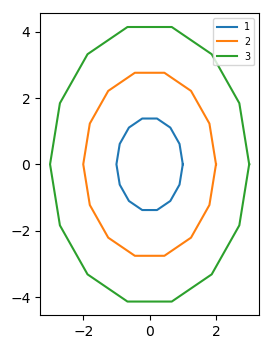

In [44]:
fig, ax = plt.subplots(1, 1)
for k in ks:
    plot2dcov(mean_1, cov_1, k, n_points=15)
plt.legend(loc='upper right', fontsize = 'x-small')

100 points

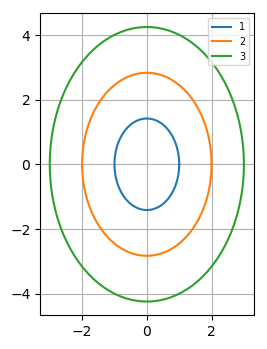

In [45]:
fig, ax = plt.subplots(1, 1)
for k in ks:
    plot2dcov(mean_1, cov_1, k, 100)
plt.legend(loc='upper right', fontsize = 'x-small')
plt.grid()

We see that result is much smoother

In [46]:
mean_2 = np.array([[5], [0]])
cov_2 = np.array([[3, -0.4], [-0.4, 2]])

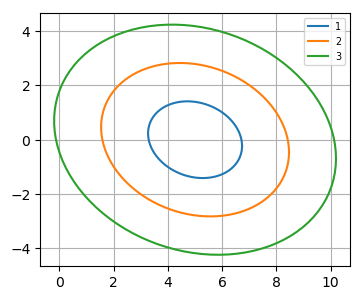

In [47]:
fig, ax = plt.subplots(1, 1)
for k in ks:
    plot2dcov(mean_2, cov_2, k, 100)
plt.legend(loc='upper right', fontsize = 'x-small')
plt.grid()

In [48]:
mean_3 = np.array([[2], [2]])
cov_3 = np.array([[9.1, 6], [6, 4]])

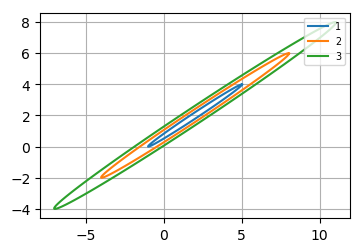

In [49]:
fig, ax = plt.subplots(1, 1)
for k in ks:
    plot2dcov(mean_3, cov_3, k, 100)
plt.legend(loc='upper right', fontsize = 'x-small')
plt.grid()

#### B

In [50]:
init_p = np.linspace(0, 2 * np.pi, 10)

In [51]:
def s_mean(p):
    return np.mean(p, axis=0)

In [52]:
np.mean(init_p)

3.141592653589793

In [53]:
s_mean(init_p)

3.141592653589793

In [54]:
def s_cov(p):
    return np.dot((p - s_mean(p)).T, (p - s_mean(p))) / (len(p) - 1)

In [55]:
s_cov(init_p)

4.4677221568717265

In [56]:
np.cov(init_p)

array(4.46772216)

It works good

#### C

In [57]:
mean_4 = np.array([[2], [2]])
cov_4 = np.array([[1, 1.3], [1.3, 3]])

In [58]:
points = np.random.normal(size=(200, 2))
l = scipy.linalg.cholesky(cov_4, lower=True)
points = (l.dot(points.T) + mean_4).T

In [59]:
s_mean(points)

array([1.93921739, 1.85158505])

In [60]:
np.mean(points, axis=0)

array([1.93921739, 1.85158505])

In [61]:
s_cov(points)

array([[1.11246149, 1.48551002],
       [1.48551002, 3.36937033]])

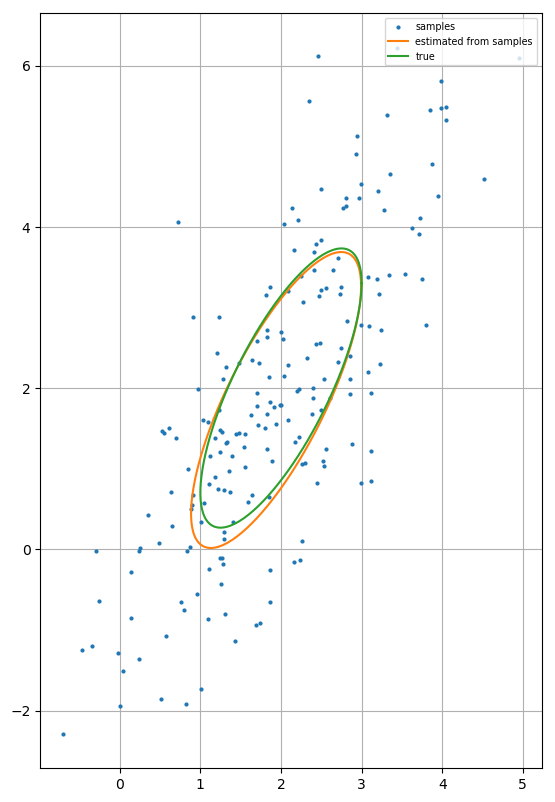

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(points.T[0], points.T[1], '.', markersize=4, label='samples')
plot2dcov(s_mean(points).reshape(-1, 1), s_cov(points), 1, 200, label='estimated from samples')
plot2dcov(mean_4, cov_4, 1, 200, label='true')
plt.legend(loc='upper right', fontsize = 'x-small')
plt.grid()

In [63]:
mean_4

array([[2],
       [2]])

In [64]:
cov_4

array([[1. , 1.3],
       [1.3, 3. ]])

In [65]:
iss = [100, 500, 1000, 5000, 20000, 100000, 1000000] #different amount of samples

In [66]:
for i in iss:
    points = np.random.normal(size=(i, 2))
    l = scipy.linalg.cholesky(cov_4, lower=True)
    points = (l.dot(points.T) + mean_4).T
    print(i)
    print(s_mean(points))
    print(s_cov(points))

100
[1.90611091 1.94211076]
[[0.93985647 1.25317798]
 [1.25317798 2.824598  ]]
500
[2.00297978 2.01612939]
[[0.98756568 1.21923683]
 [1.21923683 2.7900036 ]]
1000
[2.00800295 2.02157299]
[[1.10211742 1.50772929]
 [1.50772929 3.36517731]]
5000
[2.01661324 2.01899916]
[[1.01651336 1.31393053]
 [1.31393053 2.98111522]]
20000
[2.0062009  2.00147252]
[[1.00480368 1.30811954]
 [1.30811954 3.02722525]]
100000
[1.99968891 1.99592277]
[[1.00319649 1.30545266]
 [1.30545266 3.00619485]]
1000000
[2.00240557 2.00267273]
[[1.00007829 1.30006578]
 [1.30006578 2.9976206 ]]


As we can see, a higher amount of samples the closer mean and cov to the given values. For the small number of samples, there are fluctuations in values because of the randomness of samples and a small amount

### Task 3: Covariance Projection

#### A

In [67]:
step = 0.5
means = [np.array([[0], [0]])]
covs = [np.array([[0.1, 0], [0, 0.1]])]
n_particles = 500
#A = np.array([[1 + step, 0], [0, 1]])
#b = np.array([[2 * step], [0]])

In [68]:
def propagation(m, cov, step):
    mean = (np.array([[1 + step, 0], [0, 1]]) @ m) + np.array([[2 * step], [0]]) # A @ mean + b
    cov = np.array([[1 + step, 0], [0, 1]]) @ cov @ np.array([[1 + step, 0], [0, 1]]).T # A @ cov @ A.T
    return mean, cov

In [69]:
for i in range(6):
    mean, cov = propagation(means[-1], covs[-1], step)
    means.append(mean)
    covs.append(cov)

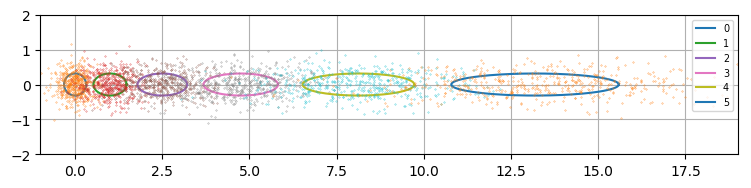

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
for i in range(6):
    plot2dcov(means[i], covs[i], 1, 500, label = str(i))
    points = np.random.multivariate_normal(means[i].flatten(), covs[i], n_particles)
    plt.plot(points.T[0], points.T[1], '.', markersize=0.5)
plt.legend(loc='upper right', fontsize = 'x-small')
ax.set_ylim(-2, 2)
ax.set_xlim(-1, 19)
plt.grid()

#### B

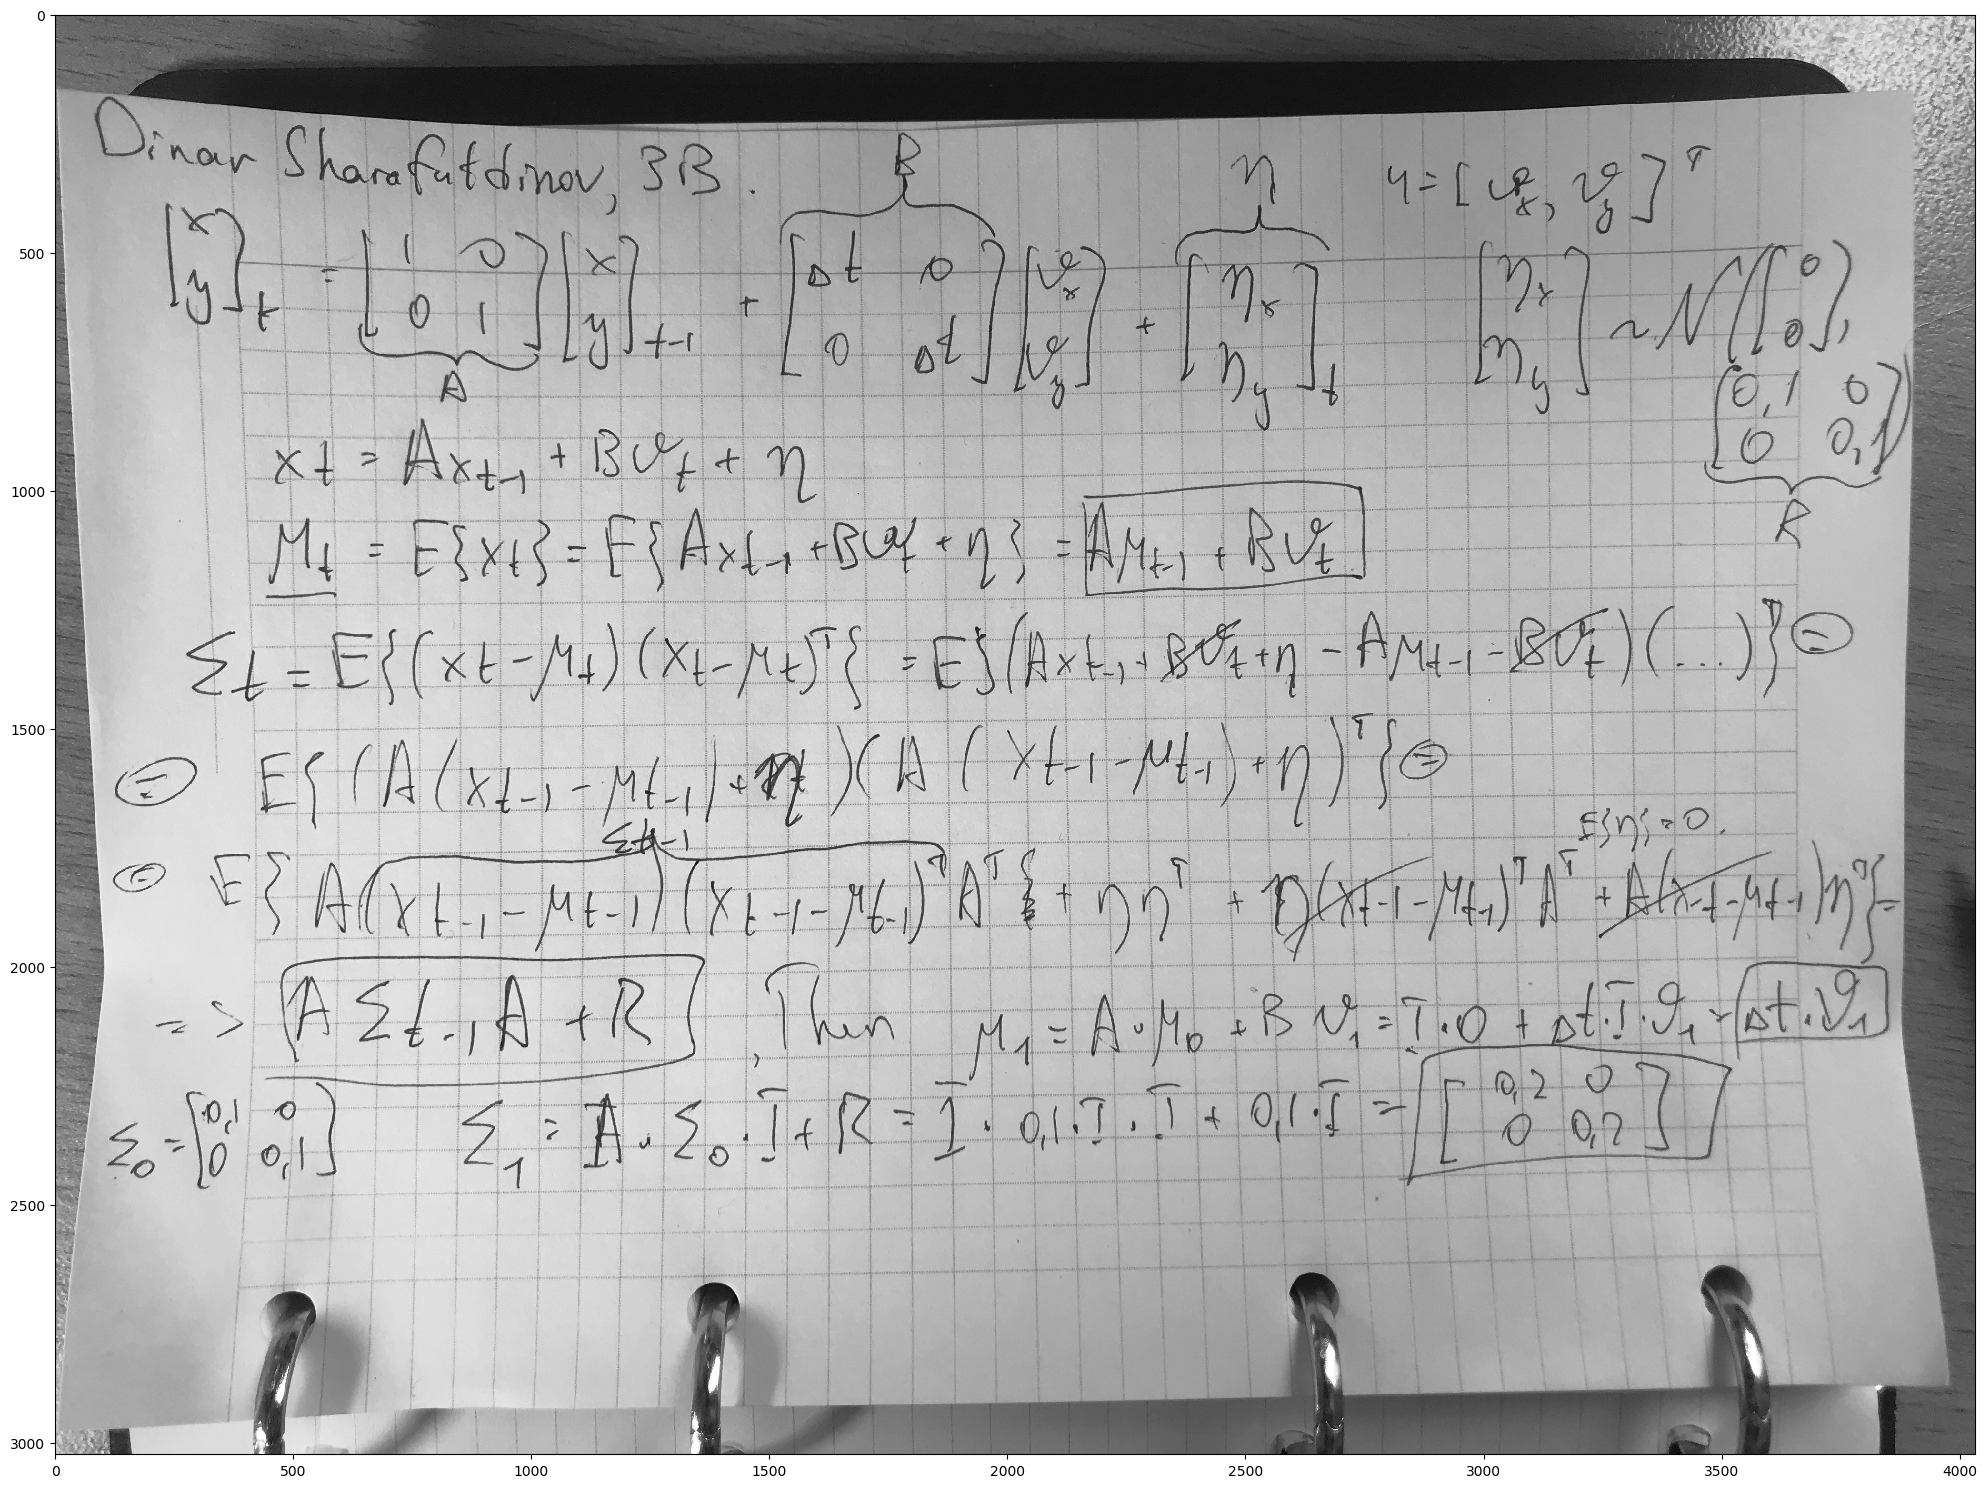

In [71]:
from skimage import io
image_full = io.imread('1.jpg', as_gray=True, plugin='matplotlib')
plt.figure(figsize=[20,20])
io.imshow(image_full)

Now we can use it for drawing the propagation state pdf

#### С

In [72]:
step = 0.5
means2 = [np.array([[0], [0]])]
covs2 = [np.array([[0.1, 0], [0, 0.1]])] 
n_particles = 500
A = np.array([[1, 0], [0, 1]])
b = np.array([[step, 0], [0, step]])
u = np.array([[3, 0], [0, 3], [3, 0], [0, -3], [3, 0]])
R = np.array([[0.1, 0], [0, 0.1]])

In [73]:
def propagation_proper(A, b, m, cov, u, R):
    mean = (A @ m) + b @ u.reshape(-1, 1)  # A @ mean + b @ u.T
    cov = A @ cov @ A.T + R   # A @ cov @ A.T + R
    return mean, cov

In [74]:
for i in range(5):
    mean, cov = propagation_proper(A, b, means2[-1], covs2[-1], u[i], R)
    means2.append(mean)
    covs2.append(cov)

In [75]:
covs2[1] # as it was shown in equations above

array([[0.2, 0. ],
       [0. , 0.2]])

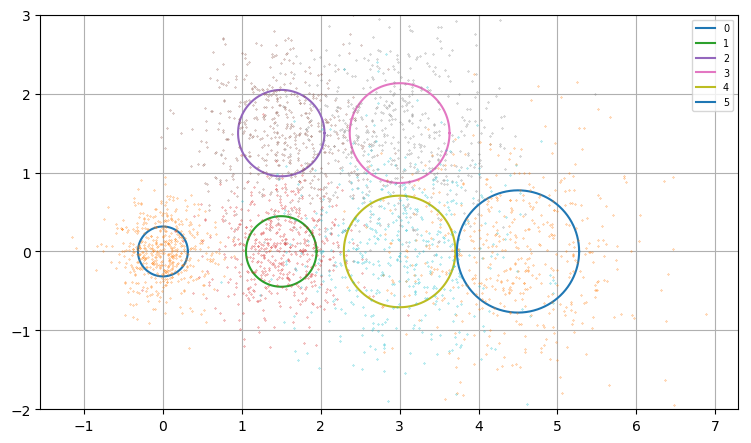

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
for i in range(6):
    plot2dcov(means2[i], covs2[i], 1, 500, label = str(i))
    points = np.random.multivariate_normal(means2[i].flatten(), covs2[i], n_particles)
    plt.plot(points.T[0], points.T[1], '.', markersize=0.5)
plt.legend(loc='upper right', fontsize = 'x-small')
ax.set_ylim(-2, 3)
plt.grid()

We clearly see the controls

#### D

In [77]:
step = 0.5
meansD = [np.array([[0], [0], [0]])]
covsD = [np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])] 
n_particles = 500
#A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
#b = np.array([[step, 0], [0, step]])
u = np.array([3, 2])
RD = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])

In [78]:
def V(theta, step):
    return np.array([[float(np.cos(theta[2])) * step, 0], [float(np.sin(theta[2])) * step, 0], [0, step]])

def G(theta, step, u):
    return np.array([[1, 0, -np.float(np.sin(theta[2]) * step * u[0])], [0, 1, np.float(np.cos(theta[2]) * step * u[0])], [0, 0, 1]])

def propagation_non_holomonic(m, cov, u, R, step):
    mean = m + V(m, step) @ u # mean + V @ u
    cov = G(m, step, u) @ cov @ G(m, step, u).T  + R # G @ cov @ G.T + R
    return mean, cov

In [79]:
for i in range(5):
    mean, cov = propagation_non_holomonic(meansD[-1], covsD[-1], u.reshape(-1, 1), RD, step)
    meansD.append(mean)
    covsD.append(cov)

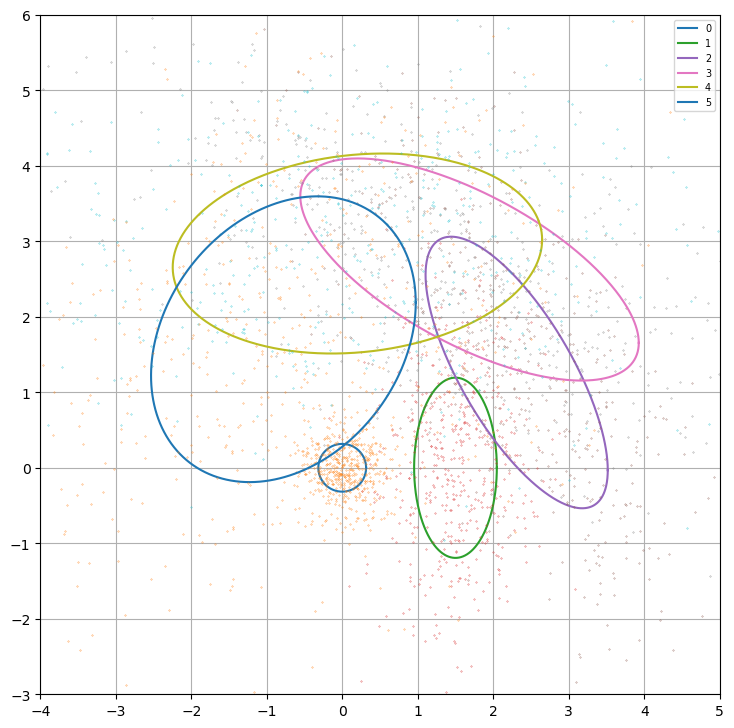

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
for i in range(6): 
    plot2dcov(meansD[i][:2], covsD[i][0:2, 0:2], 1, 500, label = str(i))
    points = np.random.multivariate_normal(meansD[i][:2].flatten(), covsD[i][0:2, 0:2], n_particles)
    plt.plot(points.T[0], points.T[1], '.', markersize=0.5)
plt.legend(loc='upper right', fontsize = 'x-small')
ax.set_ylim(-3, 6)
ax.set_xlim(-4, 5)
plt.grid()

We see that iso-contours increase in size, the reason for that may be that we are addind noise at every step 

#### C

In [81]:
RE = np.array([[2, 0], [0, 0.1]])
meansE = [np.array([[0], [0], [0]])]
covsE = [np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])] 

In [82]:
def propagation_non_holomonic_noise_action(m, cov, u, R, step):
    mean = m + V(m, step) @ u # mean + V @ u
    cov = G(m, step, u) @ cov @ G(m, step, u).T  + V(m, step) @ R @ V(m, step).T # G @ cov @ G.T + V @ R @ V.T
    return mean, cov

In [83]:
for i in range(5):
    mean, cov = propagation_non_holomonic_noise_action(meansE[-1], covsE[-1], u.reshape(-1, 1), RE, step)
    meansE.append(mean)
    covsE.append(cov)

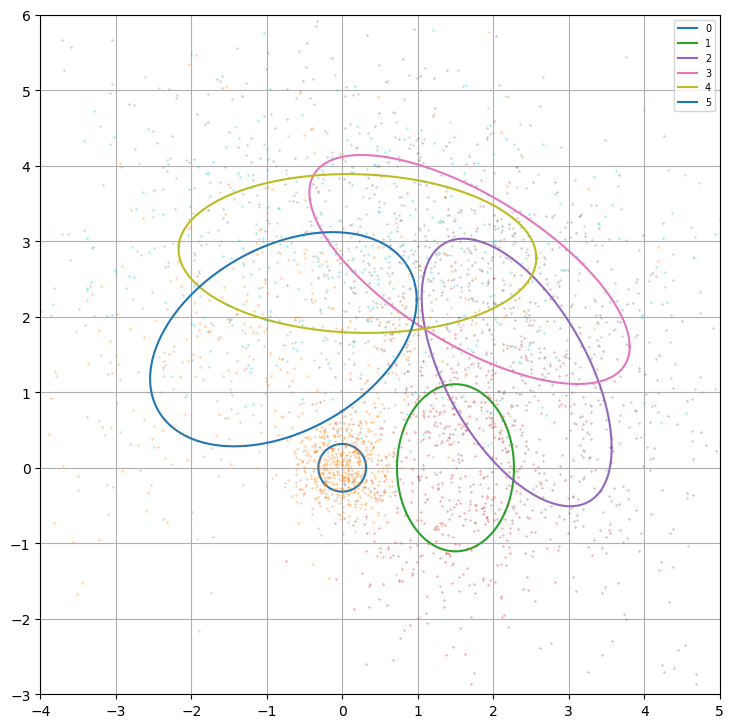

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
for i in range(6): 
    plot2dcov(meansE[i][:2], covsE[i][0:2, 0:2], 1, 500, label = str(i))
    points = np.random.multivariate_normal(meansE[i][:2].flatten(), covsE[i][0:2, 0:2], n_particles)
    plt.plot(points.T[0], points.T[1], '.', markersize=0.5)
plt.legend(loc='upper right', fontsize = 'x-small')
ax.set_ylim(-3, 6)
ax.set_xlim(-4, 5)
plt.grid()

Here we see that unlike in the previous case isocontours sometimes increase a lot, but sometimes remain the same. Here we multiply noise on V matrix from both side which is changing an effect